In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-card-customers:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F982921%2F1660340%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240430%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240430T132311Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7206e6634726bf97d25e7fdb9ff21d98dd01cf64bd637c9f6de0ac47a60cbe85bf7376a095fa72411105ae4f810273dfbfcf4bb61c2b30e20fba2dabaa0461208df5fb99da9b3376c31931f5b7e0366192ff6ffdec99618ab7899ac870c61b7f85cee39d77893e922aad0587fb0c059eb3dfe1f7fe79151464d69c37f306779eaad7cb8a92474a0979b3c606c57fad717a56521fa80cc35518ee6670089bde1ffa56023c615e2bdacaaa3f89abf01b6e6b91bba799270cc4b84af42c006a8cd3049791436f47962d8ea04419e12730ae22d9a07a4926539c8402a02300376c8013a319b67409fb6ce7772e09e1fc617010259bd0c46e1e1083e9b20b7ced24cf'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 387771 bytes downloaded
Downloaded and uncompressed: credit-card-customers
Data source import complete.


## 1. Import dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
# drop columns
df = df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [ ]:
print(f"Rows, Columns: {df.shape}\n")
df.head()

Rows, Columns: (10127, 21)



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Explore Missing Value (ms)
df_ms = df.isnull().sum()

# Missing Value (Total)
print(f"Total Missing value for each column:\n\n{df_ms}")

Total Missing value for each column:

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [ ]:
# Ckeck unique and duplicated vulues of dataframe
print(f"Check unique of CLIENTNUM = {len(df['CLIENTNUM'].unique())}")
print(f"Check duplicated of CLIENTNUM = {df['CLIENTNUM'].duplicated().sum()}")
print(f"Check duplicated of dataframe = {df.duplicated().sum()}")

Check unique of CLIENTNUM = 10127
Check duplicated of CLIENTNUM = 0
Check duplicated of dataframe = 0


In [ ]:
# Drop CLIENTNUM column
df.drop(columns=['CLIENTNUM'], inplace=True)

In [ ]:
# Catagorical and numerical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")
print(f"Categorical col: {cat_col}\nNumerical col: {num_col}")

cat_col = 6
num_col = 14

Categorical col: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical col: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [ ]:
# Explore Attrition_Flag value counts
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

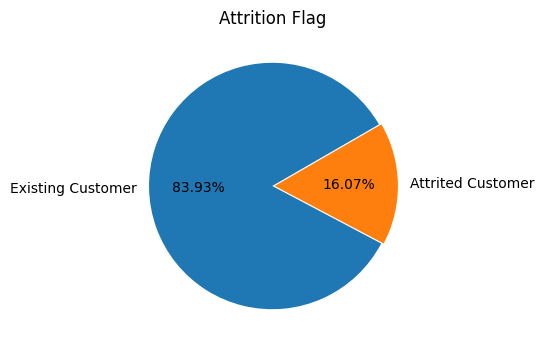

In [ ]:
# Display Attrition flag ratio
counts_att_flag = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(9,4))
plt.pie(counts_att_flag, labels=counts_att_flag.index, autopct='%1.2f%%',
        startangle=30, explode=[0, 0.02])
plt.title('Attrition Flag')

plt.show()

<ipython-input-13-83d7a150c7e9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-13-83d7a150c7e9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-13-83d7a150c7e9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-13-83d7a150c7e9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
<ipython-input-13-83d7a150c7e9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xti

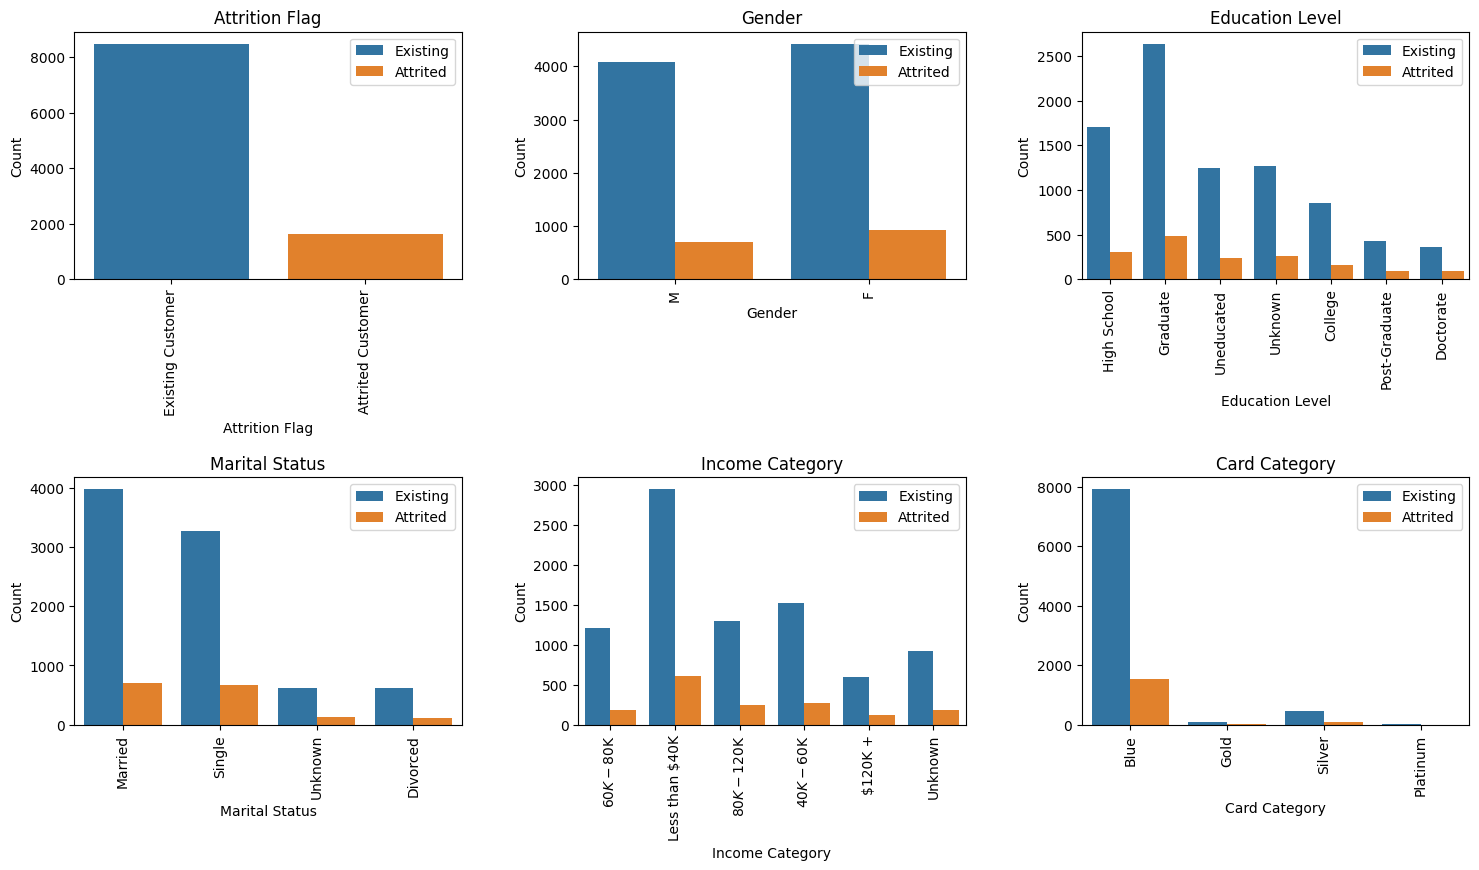

In [ ]:
# Explore Categorical column
fig1, axarr1 = plt.subplots(2, 3, figsize=(18, 9))
plt.subplots_adjust(hspace=0.8, wspace=0.3)

# Configure new title
title_cat = ['Attrition Flag', 'Gender', 'Education Level', 'Marital Status', 'Income Category', 'Card Category']

# Generate bar chart using loop
for i, col in enumerate(cat_col):
    sns.countplot(data=df, x=df[col], hue='Attrition_Flag', ax=axarr1[i // 3][i % 3])
    axarr1[i // 3][i % 3].set_xlabel(col.replace('_', ' '))
    axarr1[i // 3][i % 3].set_ylabel('Count')
    axarr1[i // 3][i % 3].set_xticklabels(axarr1[i // 3][i % 3].get_xticklabels(), rotation=90)
    axarr1[i // 3][i % 3].set_title(title_cat[i])
    axarr1[i // 3][i % 3].legend(['Existing','Attrited'])

plt.show()

In [ ]:
# Check all columns have an unknown value
for col in df.columns:
    unknown_var = (df[col]=='Unknown').any()
    if unknown_var:
        print(f"{col} has an unknown value: {unknown_var}")
    else: pass

Education_Level has an unknown value: True
Marital_Status has an unknown value: True
Income_Category has an unknown value: True


In [ ]:
# Check 'Unknown' values of the Education_Level column
qr_edl = (df['Education_Level'] == 'Unknown')
educ_lv = df[qr_edl]['Attrition_Flag'].value_counts()
print(f"Education_Level (Unknown):\n{educ_lv}")

Education_Level (Unknown):
Attrition_Flag
Existing Customer    1263
Attrited Customer     256
Name: count, dtype: int64


In [ ]:
# Check 'Unknown' values of the Marital_Status column
qr_mrs = (df['Marital_Status'] == 'Unknown')
mar_sta = df[qr_mrs]['Attrition_Flag'].value_counts()
print(f"Marital Status (Unknown):\n{mar_sta}")

Marital Status (Unknown):
Attrition_Flag
Existing Customer    620
Attrited Customer    129
Name: count, dtype: int64


In [ ]:
# Check 'Unknown' values of the Income_Category column
qr_icc = (df['Income_Category'] == 'Unknown')
inc_cat = df[qr_icc]['Attrition_Flag'].value_counts()
print(f"Income Category (Unknown):\n{inc_cat}")

Income Category (Unknown):
Attrition_Flag
Existing Customer    925
Attrited Customer    187
Name: count, dtype: int64


<ipython-input-18-f495c565ce71>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-18-f495c565ce71>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-18-f495c565ce71>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-18-f495c565ce71>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-18-f495c565ce71>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
<ipython-input-18-f495c565ce71>:17: UserWarning: FixedF

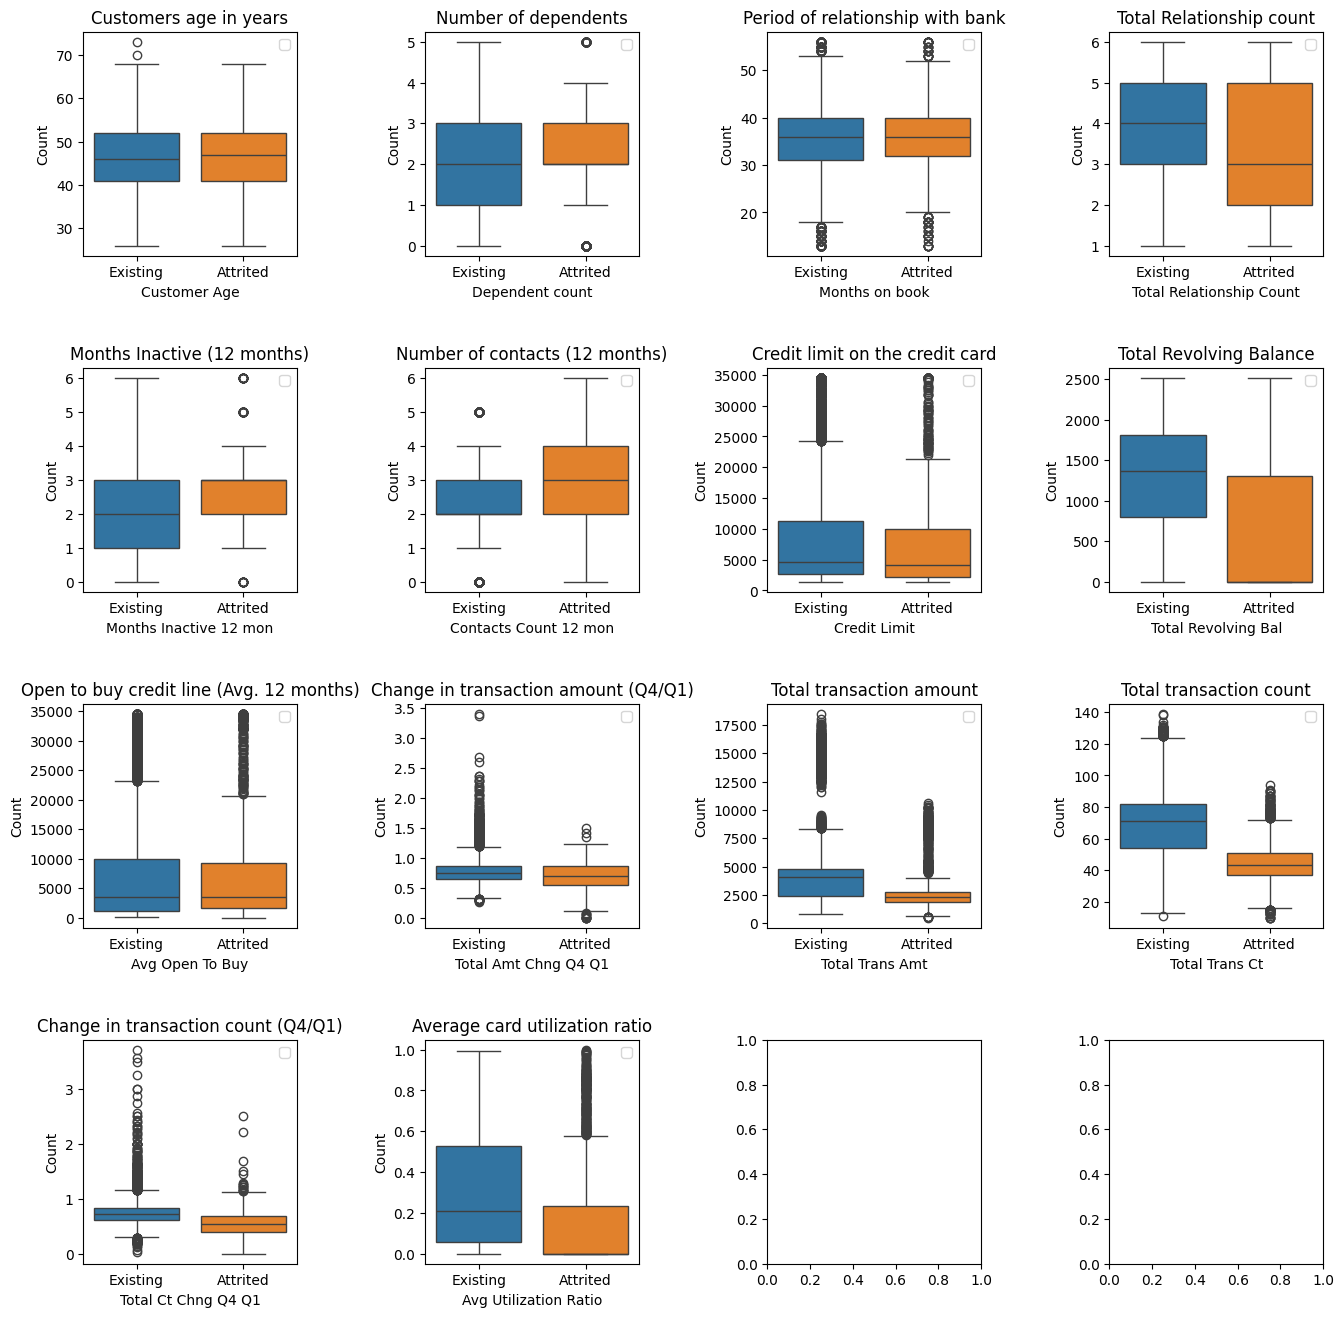

In [ ]:
# Explore Numerical column
fig2, axarr2 = plt.subplots(4, 4, figsize=(16, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.6)

# Configure new title
titles_num = ['Customers age in years', 'Number of dependents', 'Period of relationship with bank',
              'Total Relationship count', 'Months Inactive (12 months)', 'Number of contacts (12 months)',
              'Credit limit on the credit card', 'Total Revolving Balance', 'Open to buy credit line (Avg. 12 months)',
              'Change in transaction amount (Q4/Q1)', 'Total transaction amount', 'Total transaction count',
              'Change in transaction count (Q4/Q1)', 'Average card utilization ratio']

# Generate bar chart using loop
for i, col in enumerate(num_col):
    sns.boxplot(data=df, x=df['Attrition_Flag'], y=df[col], hue='Attrition_Flag', ax=axarr2[i // 4][i % 4])
    axarr2[i // 4][i % 4].set_xlabel(col.replace('_', ' '))
    axarr2[i // 4][i % 4].set_ylabel('Count')
    axarr2[i // 4][i % 4].set_xticklabels(['Existing', 'Attrited'], rotation=0)
    axarr2[i // 4][i % 4].set_title(titles_num[i])
    axarr2[i // 4][i % 4].legend([])

plt.show()

In [ ]:
# Descriptive Statistics of dataframe
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Import necessary packages
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
# Review dataframe
print(f"Rows, Columns: {df.shape}\n")
df.head()

Rows, Columns: (10127, 20)



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
# Display Education level value counts before editing
print(f"Education level (Before):\n{df['Education_Level'].value_counts()}\n")

# Configure to replace Unknow values with missing values
replace_un = {'Unknown': np.nan}
df['Education_Level'].replace(replace_un, inplace=True)

# Manage missing value in Education_Level using SimpleImputer
imp1 = SimpleImputer(strategy="most_frequent")
df[['Education_Level']] = imp1.fit_transform(df[['Education_Level']])

# Display Education level value counts using impute value with mode
print(f"Education level (Impute with mode):\n{df['Education_Level'].value_counts()}\n")

# Configure to replace new variables
educt_lavel = {'Uneducated':0, 'High School':1, 'College':2,
               'Graduate':3, 'Post-Graduate':4, 'Doctorate':5}
df.replace(educt_lavel, inplace=True)

# Display Education level value counts after editing
print(f"Education level (After):\n{df['Education_Level'].value_counts()}")

Education level (Before):
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Education level (Impute with mode):
Education_Level
Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Education level (After):
Education_Level
3    4647
1    2013
0    1487
2    1013
4     516
5     451
Name: count, dtype: int64


In [ ]:
# Display Marital status value counts before editing
print(f"Marital status (Before):\n{df['Marital_Status'].value_counts()}\n")

# Configure to replace Unknow values with missing values
replace_un = {'Unknown': np.nan}
df['Marital_Status'].replace(replace_un, inplace=True)

# Manage missing value in Marital status using SimpleImputer
imp2 = SimpleImputer(strategy="most_frequent")
df[['Marital_Status']] = imp2.fit_transform(df[['Marital_Status']])

# Display Marital status value counts using impute value with mode
print(f"Marital status (Impute with mode):\n{df['Marital_Status'].value_counts()}\n")

# Configure to replace new variables
marital_status = {'Single':0, 'Married':1, 'Divorced':2}
df.replace(marital_status, inplace=True)

# Display Marital status value counts after editing
print(f"Marital status (After):\n{df['Marital_Status'].value_counts()}")

Marital status (Before):
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Marital status (Impute with mode):
Marital_Status
Married     5436
Single      3943
Divorced     748
Name: count, dtype: int64

Marital status (After):
Marital_Status
1    5436
0    3943
2     748
Name: count, dtype: int64


In [ ]:
# Display Income category value counts before editing
print(f"Income category (Before):\n{df['Income_Category'].value_counts()}\n")

# Configure to replace Unknow values with missing values
replace_un = {'Unknown': np.nan}
df['Income_Category'].replace(replace_un, inplace=True)

# Manage missing value in Income category using SimpleImputer
imp3 = SimpleImputer(strategy="most_frequent")
df[['Income_Category']] = imp3.fit_transform(df[['Income_Category']])

# Display Income category value counts using impute value with mode
print(f"Income category (Impute with mode):\n{df['Income_Category'].value_counts()}\n")

# Configure to replace new variables
income_cat = {'Less than $40K': 0, '$40K - $60K': 1, '$60K - $80K': 2,
              '$80K - $120K': 3, '$120K +': 4}
df.replace(income_cat, inplace=True)

# Display Income category value counts after editing
print(f"Income category (After):\n{df['Income_Category'].value_counts()}")

Income category (Before):
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Income category (Impute with mode):
Income_Category
Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

Income category (After):
Income_Category
0    4673
1    1790
3    1535
2    1402
4     727
Name: count, dtype: int64


In [ ]:
# Display Attrition flag value counts before editing
print(f"Attrition Flag (Before):\n{df['Attrition_Flag'].value_counts()}\n")

# Configure to replace new variables
att_flag = {'Existing Customer':0, 'Attrited Customer':1}
df['Attrition_Flag'].replace(att_flag, inplace=True)

# Display attrition flag value counts after editing
print(f"Attrition Flag (After):\n{df['Attrition_Flag'].value_counts()}")

Attrition Flag (Before):
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Attrition Flag (After):
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64


In [ ]:
# Display Gender value counts before editing
print(f"Gender (Before):\n{df['Gender'].value_counts()}\n")

# Configure to replace new variables
gender = {'F':0, 'M':1}
df['Gender'].replace(gender, inplace=True)

# Display gender value counts after editing
print(f"Gender (After):\n{df['Gender'].value_counts()}")

Gender (Before):
Gender
F    5358
M    4769
Name: count, dtype: int64

Gender (After):
Gender
0    5358
1    4769
Name: count, dtype: int64


In [ ]:
# Display Card category value counts before editing
print(f"Card category (Before):\n{df['Card_Category'].value_counts()}\n")

# Configure to replace new variables
card_cat = {'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3}
df['Card_Category'].replace(card_cat, inplace=True)

# Display Card category value counts after editing
print(f"Card category (After):\n{df['Card_Category'].value_counts()}")

Card category (Before):
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

Card category (After):
Card_Category
0    9436
1     555
2     116
3      20
Name: count, dtype: int64


In [ ]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [ ]:
# Review dataframe (After editing)
print(f"Rows, Columns: {df.shape}\n")
df.head()

Rows, Columns: (10127, 20)



,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,0,5,3,0,0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,1,3,3,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,0,4,1,1,0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,1,3,0,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
from google.colab import files
df.to_csv('final_preprocessed_data.csv', index=False)
files.download('final_preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 4. Feature Selection

In [ ]:
# Import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

<Axes: >

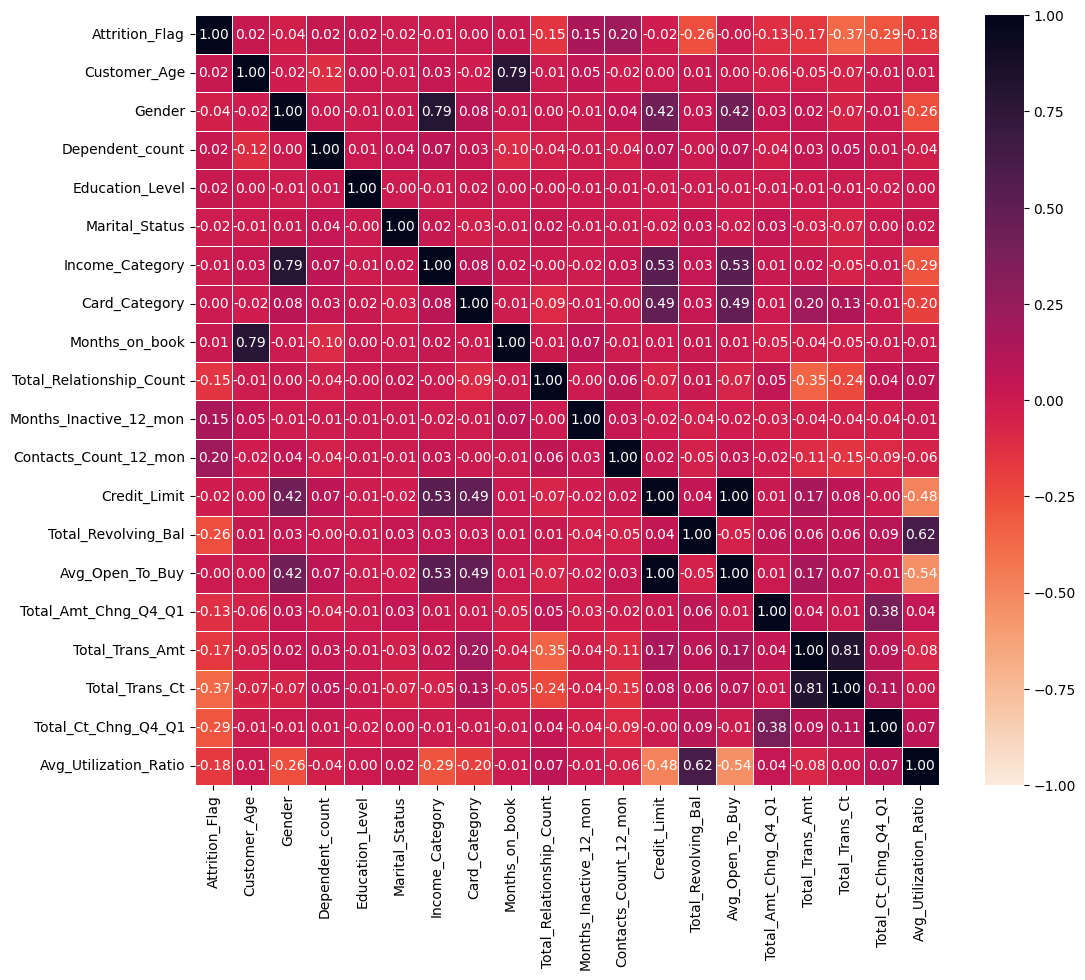

In [ ]:
# Correlation Coefficient of all the Features
corr_matrix_df = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_df, vmin= -1, vmax= 1, linewidths=0.5, cmap='rocket_r', annot=True, fmt='.2f')   # Cmd check cmap => plt.colormaps()

In [ ]:
x = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

In [ ]:
# Explore the best-performing features in 4 ensemble models
model_rf = RandomForestClassifier(n_estimators=250, max_depth = 1, random_state=0)
model_xb = XGBClassifier(n_estimators=250, learning_rate = 0.1, max_depth = 1, random_state = 0)
model_et = ExtraTreesClassifier(n_estimators=250, max_depth = 1, random_state = 0)
model_gd = GradientBoostingClassifier(n_estimators=250, learning_rate = 0.1, max_depth = 1, random_state = 0)

# Training model
model_rf.fit(x, y)
model_xb.fit(x, y)
model_et.fit(x, y)
model_gd.fit(x, y)

GradientBoostingClassifier(max_depth=1, n_estimators=250, random_state=0)

In [ ]:
# Display feature importances values for Random forest
fi_rf = pd.Series(model_rf.feature_importances_, index=x.columns).sort_values(ascending=True)
fi_rf

Dependent_count             0.000
Marital_Status              0.000
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Customer_Age                0.004
Gender                      0.004
Education_Level             0.008
Avg_Open_To_Buy             0.008
Total_Relationship_Count    0.016
Credit_Limit                0.020
Months_Inactive_12_mon      0.044
Total_Amt_Chng_Q4_Q1        0.060
Contacts_Count_12_mon       0.072
Avg_Utilization_Ratio       0.088
Total_Ct_Chng_Q4_Q1         0.144
Total_Revolving_Bal         0.164
Total_Trans_Amt             0.164
Total_Trans_Ct              0.204
dtype: float64

In [ ]:
# Display feature importances values for XGBoost
fi_xb = pd.Series(model_xb.feature_importances_, index=x.columns).sort_values(ascending=True)
fi_xb

Avg_Utilization_Ratio       0.000000
Dependent_count             0.000000
Education_Level             0.000000
Marital_Status              0.000000
Income_Category             0.000000
Card_Category               0.000000
Months_on_book              0.000000
Credit_Limit                0.000000
Avg_Open_To_Buy             0.023286
Gender                      0.028143
Customer_Age                0.028607
Total_Amt_Chng_Q4_Q1        0.042450
Contacts_Count_12_mon       0.050943
Total_Trans_Amt             0.053139
Months_Inactive_12_mon      0.077619
Total_Relationship_Count    0.126376
Total_Trans_Ct              0.147949
Total_Ct_Chng_Q4_Q1         0.209702
Total_Revolving_Bal         0.211785
dtype: float32

In [ ]:
# Display feature importances values for ExtraTrees
fi_et = pd.Series(model_et.feature_importances_, index=x.columns).sort_values(ascending=True)
fi_et

Card_Category               0.000
Marital_Status              0.004
Income_Category             0.004
Months_on_book              0.004
Credit_Limit                0.008
Avg_Open_To_Buy             0.012
Dependent_count             0.012
Education_Level             0.012
Customer_Age                0.024
Months_Inactive_12_mon      0.048
Total_Amt_Chng_Q4_Q1        0.052
Total_Ct_Chng_Q4_Q1         0.052
Gender                      0.068
Total_Trans_Amt             0.072
Total_Relationship_Count    0.104
Avg_Utilization_Ratio       0.112
Contacts_Count_12_mon       0.132
Total_Trans_Ct              0.136
Total_Revolving_Bal         0.144
dtype: float64

In [ ]:
# Display feature importances values for GradientBoosting
fi_gd = pd.Series(model_gd.feature_importances_, index=x.columns).sort_values(ascending=True)
fi_gd

Avg_Utilization_Ratio       0.000000
Gender                      0.000000
Dependent_count             0.000000
Education_Level             0.000000
Marital_Status              0.000000
Income_Category             0.000000
Card_Category               0.000000
Months_on_book              0.000000
Avg_Open_To_Buy             0.000000
Credit_Limit                0.000000
Customer_Age                0.006393
Months_Inactive_12_mon      0.020165
Total_Amt_Chng_Q4_Q1        0.027342
Contacts_Count_12_mon       0.030086
Total_Relationship_Count    0.049321
Total_Ct_Chng_Q4_Q1         0.129862
Total_Trans_Amt             0.166102
Total_Revolving_Bal         0.230004
Total_Trans_Ct              0.340727
dtype: float64

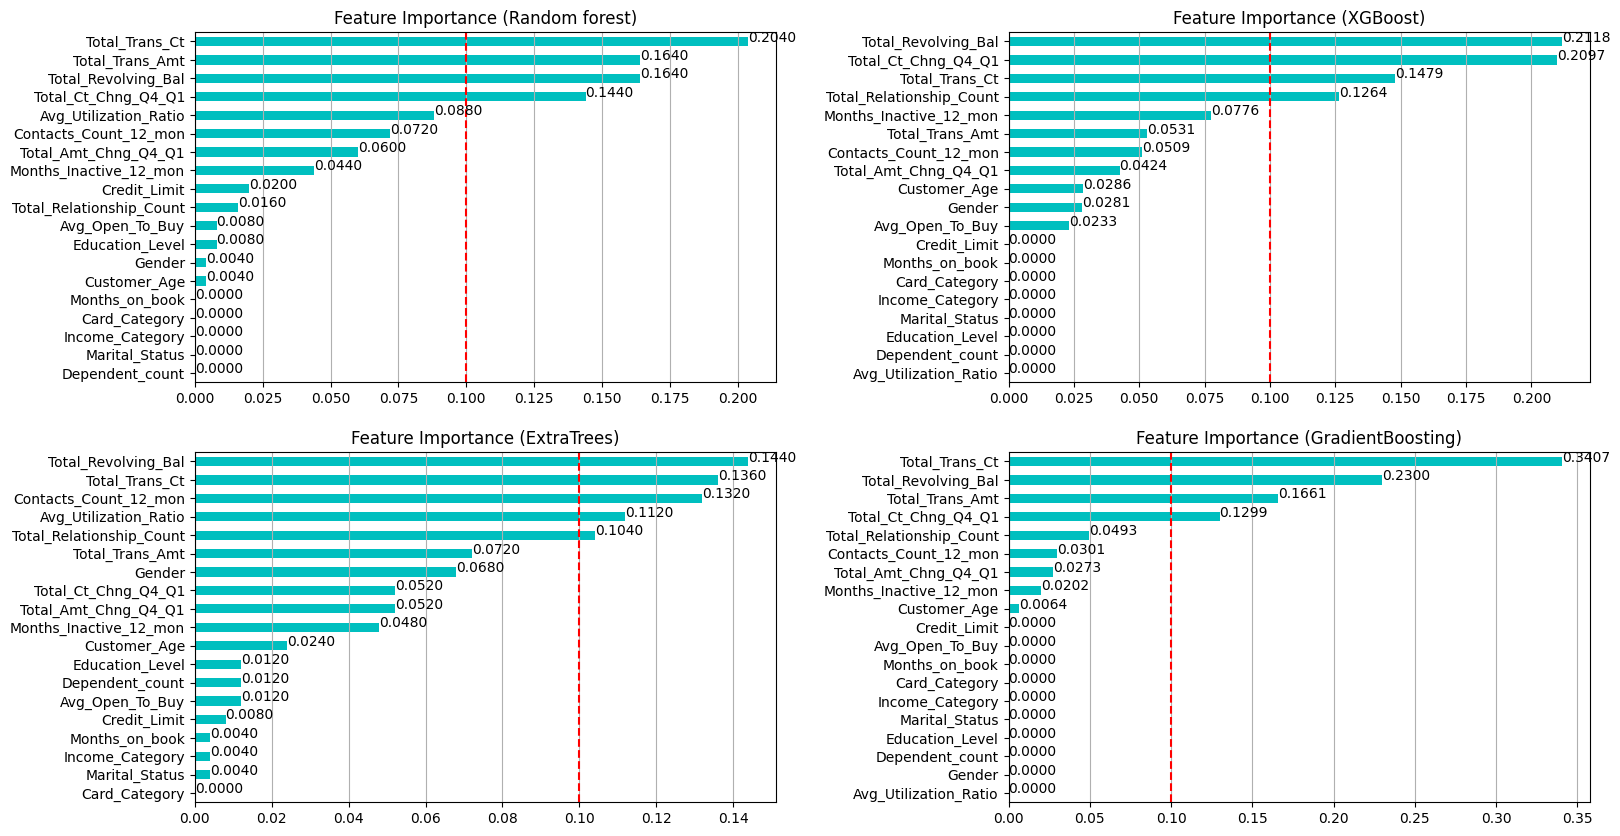

In [ ]:
# Display Feature Importance for all models
model_list = [fi_rf, fi_xb, fi_et, fi_gd]
model_names = ['Random forest', 'XGBoost', 'ExtraTrees','GradientBoosting']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

for id, model in enumerate(model_list):
    row = id // 2
    col = id % 2
    ax = model.plot(kind='barh', color='c', title=f"Feature Importance ({model_names[id]})", ax=axes[row, col])
    ax.axvline(x=0.1, linestyle='--', color='red', linewidth=1.5)
    ax.grid(axis='x', linestyle='-')

    for i, val in enumerate(model):
        ax.text(val, i, '{:.4f}'.format(val))

plt.subplots_adjust(hspace=0.2, wspace=0.4)
plt.show()

In [ ]:
# Create a multi-choice list and choose 'df_fi' based on the importance of the feature that gives the model the best accuracy score.

df_fi = df[fi_rf[fi_rf > 0.1].index]    # [Random forest] --> Best Choice!
#df_fi = df[fi_xb[fi_xb > 0.1].index]    # [XGBoost]
#df_fi = df[fi_et[fi_et > 0.1].index]    # [ExtraTrees]
#df_fi = df[fi_gd[fi_gd > 0.1].index]    # [GradientBoosting]

# Overview df_fi dataframe
df_fi.head()

,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,1.625,777,1144,42
1,3.714,864,1291,33
2,2.333,0,1887,20
3,2.333,2517,1171,20
4,2.500,0,816,28


## 5. Feature Scaling

In [ ]:
# Standardize the feature (Z-Values) using "StandardScaler" class
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_fi_scaled = pd.DataFrame(sc.fit_transform(df_fi), columns= df_fi.columns)

In [ ]:
df_fi_scaled.head()

,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,3.834003,-0.473422,-0.959707,-0.973895
1,12.608573,-0.366667,-0.916433,-1.357340
2,6.807864,-1.426858,-0.740982,-1.911206
3,6.807864,1.661686,-0.951758,-1.911206
4,7.509325,-1.426858,-1.056263,-1.570365


In [ ]:
# Display the variance of each feature.
df_fi_scaled.var()

Total_Ct_Chng_Q4_Q1    1.000099
Total_Revolving_Bal    1.000099
Total_Trans_Amt        1.000099
Total_Trans_Ct         1.000099
dtype: float64

In [ ]:
# Combine data
df_scaled = pd.concat([df_fi_scaled, df[['Attrition_Flag']]], axis=1)

In [ ]:
# Review df_scaled after combining data
df_scaled.head()

,Total_Ct_Chng_Q4_Q1,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,Attrition_Flag
0,3.834003,-0.473422,-0.959707,-0.973895,0
1,12.608573,-0.366667,-0.916433,-1.357340,0
2,6.807864,-1.426858,-0.740982,-1.911206,0
3,6.807864,1.661686,-0.951758,-1.911206,0
4,7.509325,-1.426858,-1.056263,-1.570365,0


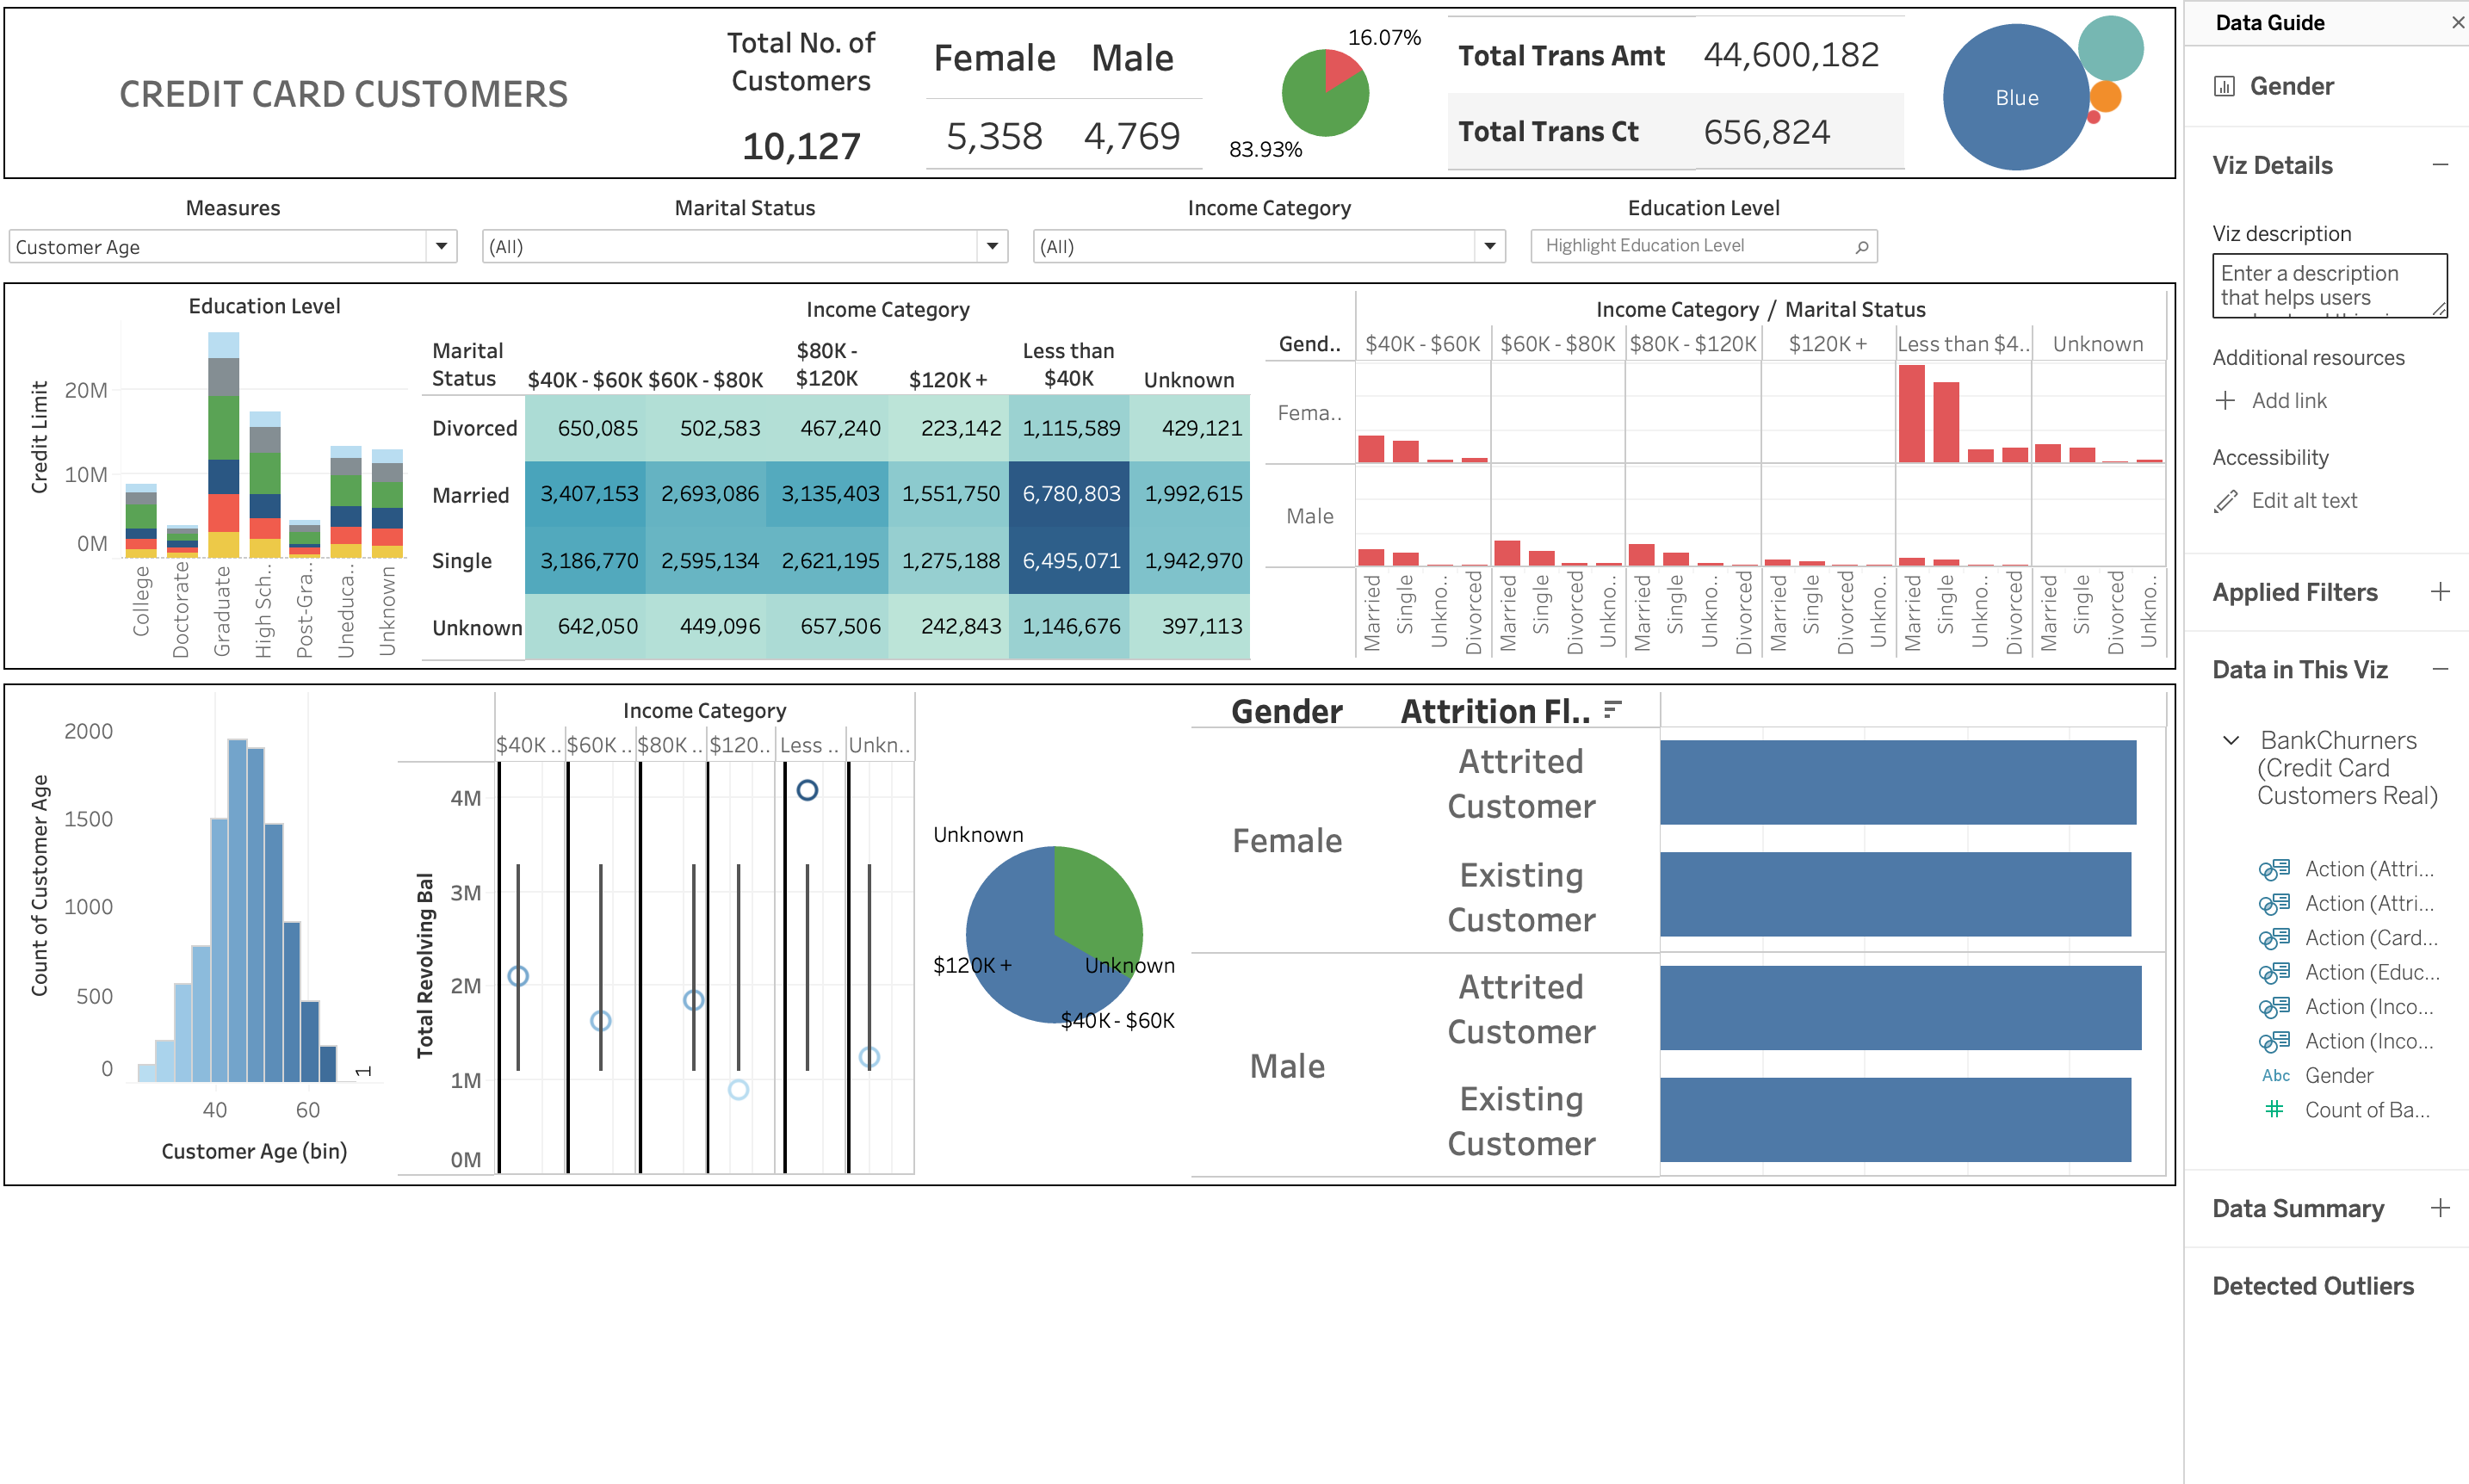

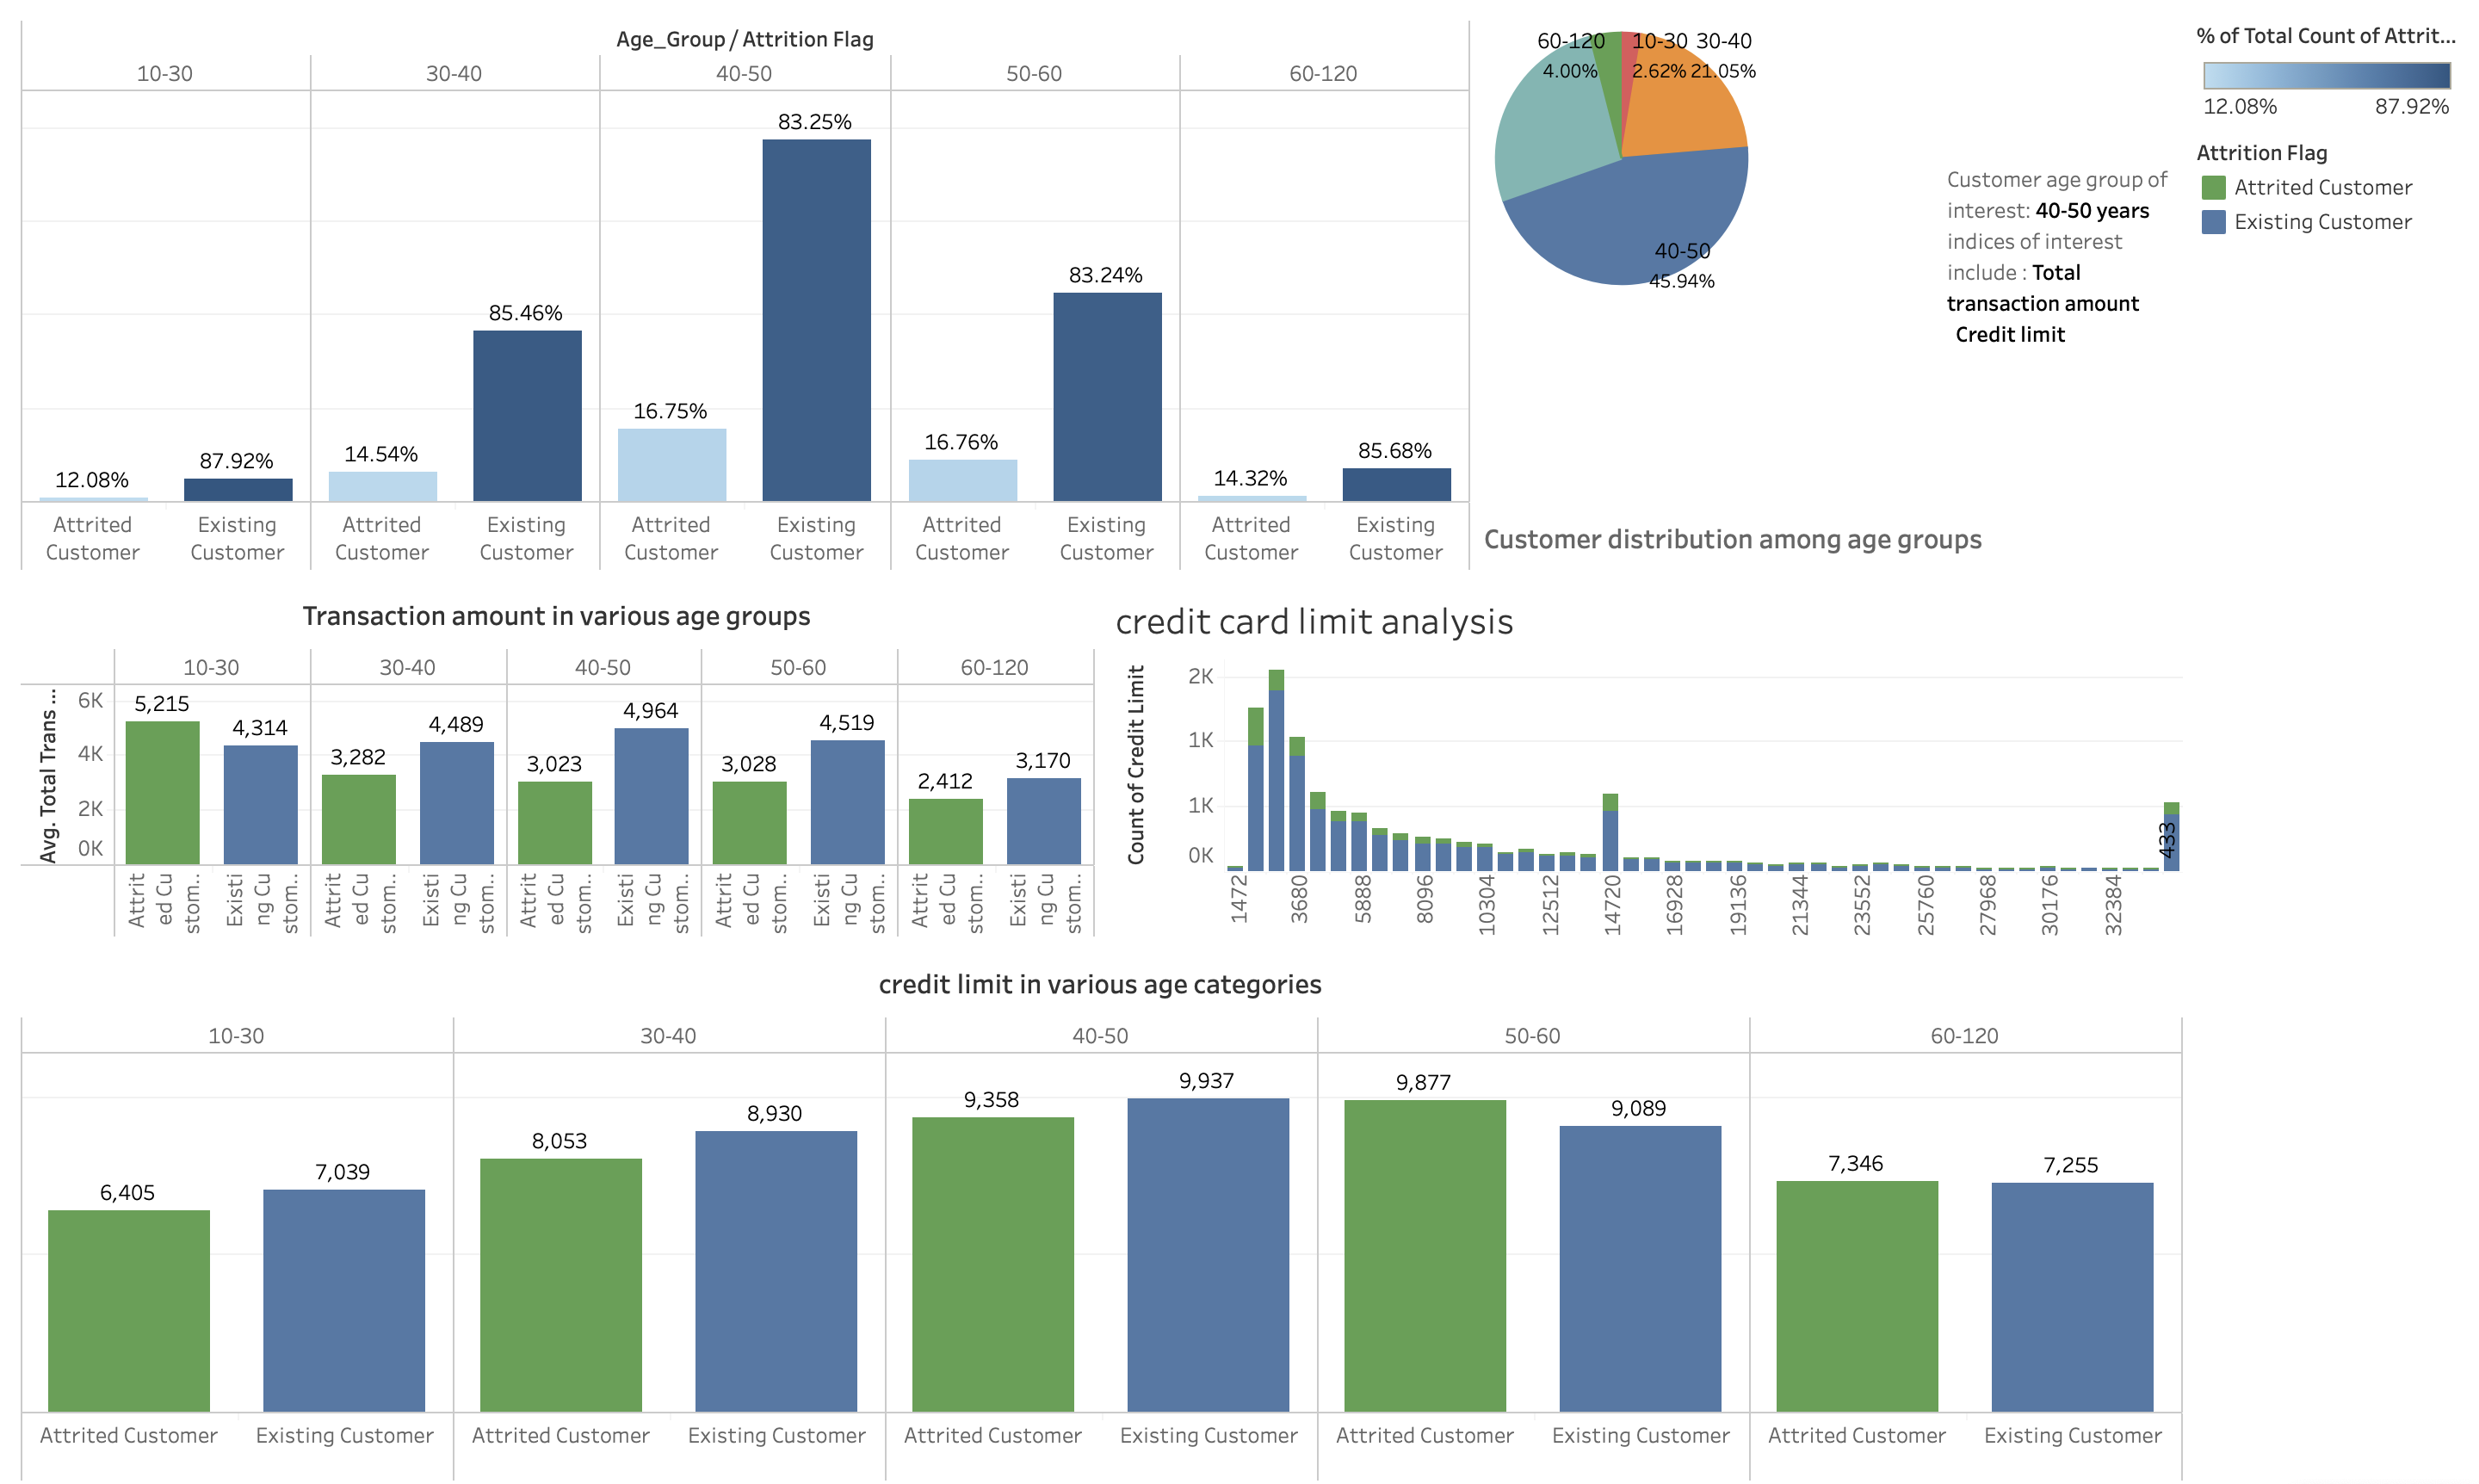